In [1]:
!git clone https://github.com/Leejunho123/5G_project.git
%cd 5G_project/DeepLearning

Cloning into '5G_project'...
remote: Enumerating objects: 389, done.
remote: Counting objects: 100% (389/389), done.
remote: Compressing objects: 100% (243/243), done.
remote: Total 11417 (delta 294), reused 233 (delta 145), pack-reused 11028
Receiving objects: 100% (11417/11417), 245.93 MiB | 26.53 MiB/s, done.
Resolving deltas: 100% (2832/2832), done.
Checking out files: 100% (246/246), done.
/content/5G_project/DeepLearning


In [ ]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch-3.git
%cd deep-learning-from-scratch-3

Cloning into 'deep-learning-from-scratch-3'...
remote: Enumerating objects: 2097, done.
remote: Total 2097 (delta 0), reused 0 (delta 0), pack-reused 2097
Receiving objects: 100% (2097/2097), 32.30 MiB | 26.12 MiB/s, done.
Resolving deltas: 100% (1444/1444), done.
/content/deep-learning-from-scratch-3


## 43 신경망

### 43.1 Dezero의 linear 함수
+ y = F.matmul(x, W) + b : 선형 변환, 아핀 변환

In [ ]:
def linear_simple(x, W, b=None):
  t = matmul(x, W)
  if b is None:
    return t

  y = t + b
  t.data = None

  return y

In [ ]:
class Linear(Function):
  def forward(self, x, W, b):
    y = x.dot(W)
    if b is not None:
      y += b

    return y

  def backward(self, gy):
    x, W, b = self.inputs
    gb = None if b.data is None else sum_to(gy, b.shape)
    gx = matmul(gy, W.T)
    gW = matmul(x.T, gy)
    return gx, gW, gb

def linear(x, W, b=None):
  return Linear()(x,W,b)
  

### 43.2 비선형 데이터셋

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100,1)


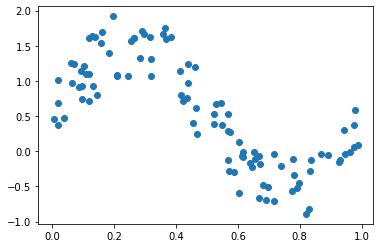

In [ ]:
plt.scatter(x,y)

### 43.3 활성화 함수와 신경망

In [ ]:
def sigmoid_simple(x):
  x = as_variable(x)
  y = 1 / (1 + exp(-x))
  return y



In [ ]:
class Sigmoid(Function):
  def forward(self, x):
    x = as_variable(x)
    y = 1 / (1 + exp(-x))
    return y

  def backward(self, gy):
    y = self.outputs[0]()
    gx = gy * y * (1-y)
    return gx

def sigmoid(x):
  return Sigmoid()(x)

### 43.4 신경망 구현

In [ ]:
W1, b1 = Variable(...), Variable(...)
W2, b2 = Variable(...), Variable(...)

def predict(x):
  y = F.linear(x, W1, b1)
  y = F.sigmoid(y)
  y = F.linear(y, W2, b2)
  return y

In [2]:
import numpy as np
from dezero import Variable
import dezero.functions as F

np.random.seed(0)
x = np.random.rand(100,1)
y = np.sin(2*np.pi*x)+np.random.rand(100,1)

I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H,O))
b2 = Variable(np.zeros(O))

def predict(x):
  y = F.linear(x, W1, b1)
  y = F.sigmoid(y)
  y = F.linear(y, W2, b2)
  return y

lr = 0.2
iters = 10000


for i in range(iters):
  y_pred = predict(x)
  loss = F.mean_squared_error(y, y_pred)

  W1.cleargrad()
  b1.cleargrad()
  W2.cleargrad()
  b2.cleargrad()
  loss.backward()
  W1.data = W1.data - lr * W1.grad.data
  b1.data = b1.data - lr * b1.grad.data
  W2.data = W2.data - lr * W2.grad.data
  b2.data = b2.data - lr * b2.grad.data
  
  if i % 1000 == 0:
    print(loss)

variable(0.8473695850105871)
variable(0.2514286285183606)
variable(0.2475948546674987)
variable(0.2378612044705482)
variable(0.21222231333102928)
variable(0.1674218111783415)
variable(0.09681932619992648)
variable(0.07849528290602334)
variable(0.07749729552991161)
variable(0.07722132399559319)
